# Democratic vs. Republican Party - Combined Debates (1960, 1976, 1980)

In [7]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

#code modified from Dr. Mokus's Mini Project1 Writeup
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', ':', '(', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', '–', 'still', 'good', 'well',
'said', 'â\x80\x9ci', 'thats','its','I', 'mr', 'project', 'one', 'uh', 'don’t',
 'would', 'made', 'it’s','…','that’s']

def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

def cleanWord (w):
    wn = re.sub('[,"\.\'&\|@>*;/=]', "", w)
    return re.sub('^[0-9\.]*$', "", wn)
       
def debate_word_dictionary_generator (URL, name1, name2, modList, name1Arr, name2Arr):
    r = requests .get(URL)
    t = cleanHtml (r .text) .lower()
    wds = re .split('\s+',t)

    for i in range(len(wds)):
        wds[i] = cleanWord (wds [i])
        
    #name1Arr = []
    #name2Arr = []
    switcher = 3
            
    for i in range(len(wds)):
        if wds[i] == name1:
            switcher = 1
            
        elif wds[i] == name2:
            switcher = 2
            
        elif wds[i] in modList:
            switcher = 3
            
        else:
            if switcher == 1:
                name1Arr.append(wds[i])
                
            elif switcher == 2:
                name2Arr.append(wds[i])
    wf1 = Counter (name1Arr)
    wf2 = Counter (name2Arr)
    

    for k in stop_words:
        wf1. pop(k, None)
        wf2. pop(k, None)

    tw1 = 0
    for w in wf1:
       tw1 += wf1[w]
        
    tw2 = 0
    for w in wf2:
       tw2 += wf2[w] 
    wfs1 = sorted (wf1 .items(), key = operator.itemgetter(1), reverse=True)
    ml1 = min(len(wfs1),30)
    
    wfs2 = sorted (wf2 .items(), key = operator.itemgetter(1), reverse=True)
    ml2 = min(len(wfs2),30)

    return [(wfs1 [ 0:ml1 ] [::-1], tw1), (wfs2 [ 0:ml2 ] [::-1], tw2)]
a = []
a2 = []

#1960
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/september-26-1960-debate-transcript/', "kennedy:", "nixon:", ['smith:', 'vanocur:', 'novins:', 'warren:', 'fleming:'],a,a2)
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-7-1960-debate-transcript/', "kennedy:", "nixon:", ['mcgee:', 'nivem:', 'morgan:', 'spivak:', 'levy:'],a,a2)
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-13-1960-debate-transcript/', "kennedy:", "nixon:", ['shadel:', 'mcgee:', 'fremd:', 'cater:', 'drummond:'],a,a2)
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-21-1960-debate-transcript/', "kennedy:", "nixon:", ['howe:', 'singiser:', 'cronkite:', 'chancellor:'],a,a2)

#1976
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/september-23-1976-debate-transcript/', "carter:", "ford:", ['reynolds:', 'newman:', 'gannon:', 'drew:'],a,a2)
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-6-1976-debate-transcript/', "carter:", "ford:", ['valeriani:', 'frederick:', 'frankel:', 'trewhitt:'],a,a2)
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-22-1976-debate-transcript/', "carter:", "ford:", ['walters:', 'kraft:', 'maynard:', 'nelson:'],a,a2)
#1980
debates = debate_word_dictionary_generator ('https://debates.org/voter-education/debate-transcripts/october-28-1980-debate-transcript/', "carter:", "reagan:", ['hinerfeld:', 'stone:', 'smith:', 'ellis:', 'hilliard:', 'walters:'],a,a2)

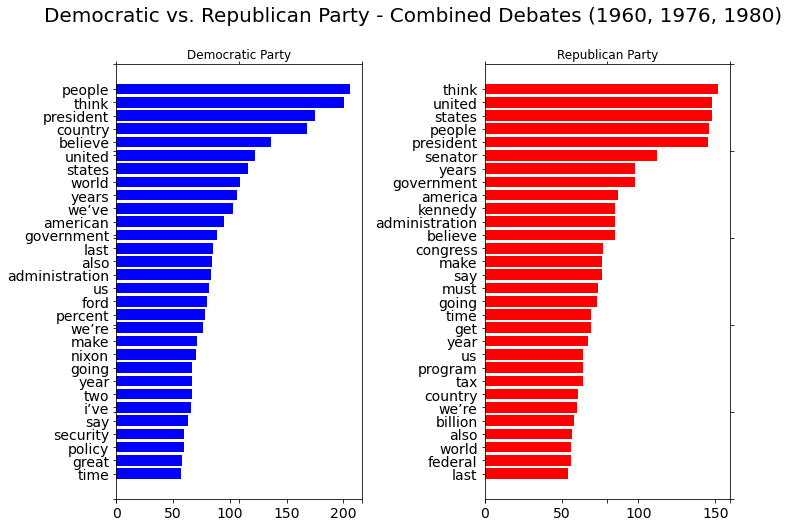

In [8]:
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(11, 8))
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)


    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center',color='b')
    #added titles to subplots
    ax1.title.set_text('Democratic Party')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center',color='r')
    ax2.title.set_text('Republican Party')

plotTwoLists (debates[0][0], debates[1][0],'Democratic vs. Republican Party - Combined Debates (1960, 1976, 1980)')

